# Monte Carlo Methods

## Estimating $\pi$

*Hello World: Monte Carlo Edition*

* $x,y \sim \mathcal{U_{[-1,1]}}.$
* Area of the square: $A_\square=4$
* Area of the circle: $A_O = \pi$
    * Is the sampled point inside of the the circle ($x^2 + y^2 < 1$)? 

Random Variable $X(\omega)$ = 1 .... point $x,y$ inside of circle, $X(\omega)$ = 0 otherwise

$P(X) = \frac{A_O}{A_\square} = \frac{\pi}{4}$



In [35]:
# imports for the notebook
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
plt.style.use("seaborn-v0_8-darkgrid")

interactive(children=(IntSlider(value=1, description='n', max=10000, min=1), Output()), _dom_classes=('widget-…

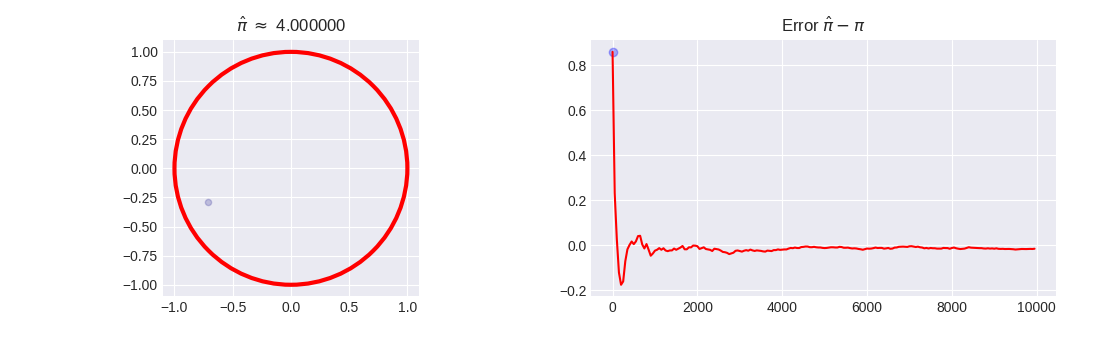

In [48]:
# Estimating Pi Example (INTERACTIVE)
%matplotlib widget

num_samples = 10000
x = np.random.uniform(low=-1, high=1, size=num_samples)
y = np.random.uniform(low=-1, high=1, size=num_samples)
c = x**2 + y**2 < 1

fig, axes = plt.subplots(1, 2, figsize=(11,3.5))
ax = axes[0]; er = axes[1]; fig.tight_layout(pad=2.5)
er.set_xlim(0, num_samples)


circle = plt.Circle((0, 0), 1, color='r',fill=False, linewidth=3)
pi_t = [4*((sum(c[:i])/i))-np.pi for i in range(1,num_samples, 50)]

@widgets.interact(n=(1, num_samples, 1))
def update(n = 1):
    ax.clear(); ax.set_aspect('equal');
    er.clear(); er.grid('on'); 
    ax.scatter(x[:n], y[:n], c=c[:n], alpha=0.2, s=20, cmap='plasma')

    pi_hat = 4*((sum(c[:n])/n))
    er.plot(range(1,num_samples, 50), pi_t, '-r')
    er.scatter(n, pi_hat-np.pi, alpha=0.3, c='blue');ax.add_patch(circle)
    
    ax.set_title(r"$\hat{\pi}$ $\approx$ " + f"{pi_hat:.6f}")
    er.set_title(r"Error $\hat{\pi}-\pi$")


# Sample from a distribution

## Rejection Sampling 

pretty cool how we can actually draw from different distr.
basic idea: 
* take distr that we know how to draw from
* scale it over the Distr we want to sample from
* Reject samples that are above D(x)



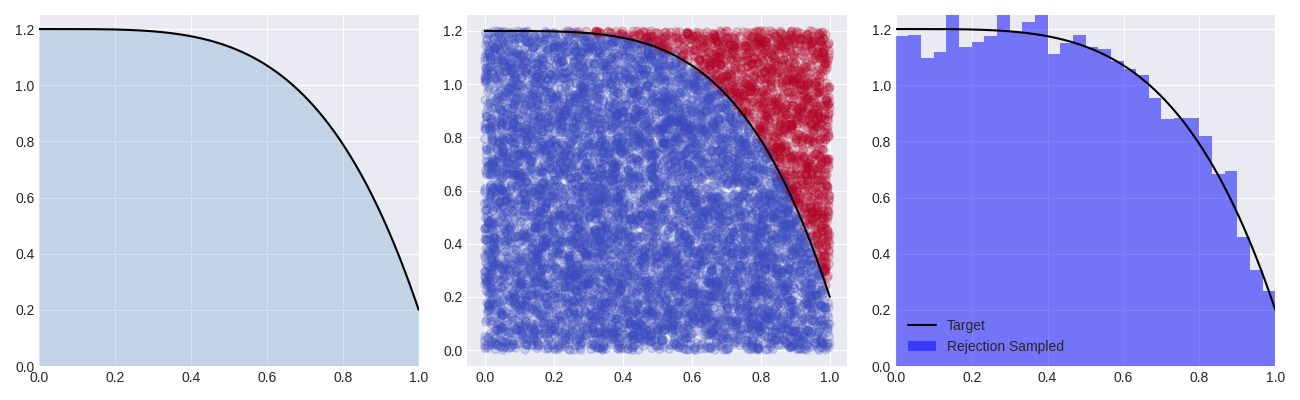

In [47]:
maxy = 1.2

def f(x):
    return maxy - x**5

xs = np.linspace(0, 1, 1000)
ys = f(xs)
fig, dist_ax = plt.subplots(1,3, figsize=(13, 4))

dist_ax[0].plot(xs, ys, label="Forward Function", c='k') 
dist_ax[0].fill_between(xs, ys, 0, alpha=0.2)
dist_ax[0].set_xlim([0, 1]), dist_ax[0].set_ylim([0, 1.25])

x = np.random.uniform(low=0, high=1,    size=10000)
y = np.random.uniform(low=0, high=maxy, size=10000)
c = y<f(x)

dist_ax[1].plot(xs, ys, c='k')
dist_ax[1].scatter(x, y, alpha=0.2, label="Samples", c=c, cmap='coolwarm_r')

dist_ax[2].plot(xs, ys, label="Target", c='k')
dist_ax[2].hist(x[c], bins=30, density=True, alpha=0.5, label="Rejection Sampled", color='blue')
dist_ax[2].set_xlim([0, 1]), dist_ax[2].set_ylim([0, 1.25]),
plt.legend()
plt.tight_layout()

## Importance Sampling

## Expected Value

$$
\bar{X} = E(X) = \sum_{s \in S} p(s)X(s)\\
\text{"What are we going to get on average?"}\\
$$


## Variance


$$
Var[X] = E[(X - \bar{X})^2]\\
\text{"How tightly clustered will my results be?"}\\
$$





show S f(x) * p(x)/q(x) * q(x) <---- tractable since we can choose q(x)

## Inversion Sampling
